In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

from xgboost import XGBClassifier
from xgboost import plot_importance6
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
try:
    df = pd.read_csv('parkinsons1.csv')
except FileNotFoundError:
    print("Dataset file not found. Please make sure the file is in the correct directory.")

df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
df.shape

(195, 24)

# Data Pre-Processing and Wrangling

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

#Get Features ans Labels

#Features are columns that are without column status and the label includes status column

In [ ]:
features=df.loc[:,df.columns!='status'].values[:,1:]
x1=df.loc[:,df.columns!='status']
features.shape

(195, 22)

In [ ]:
features

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [ ]:
labels=df.loc[:,'status'].values
y1=df.loc[:,'status']
labels.shape

(195,)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Data Analysis

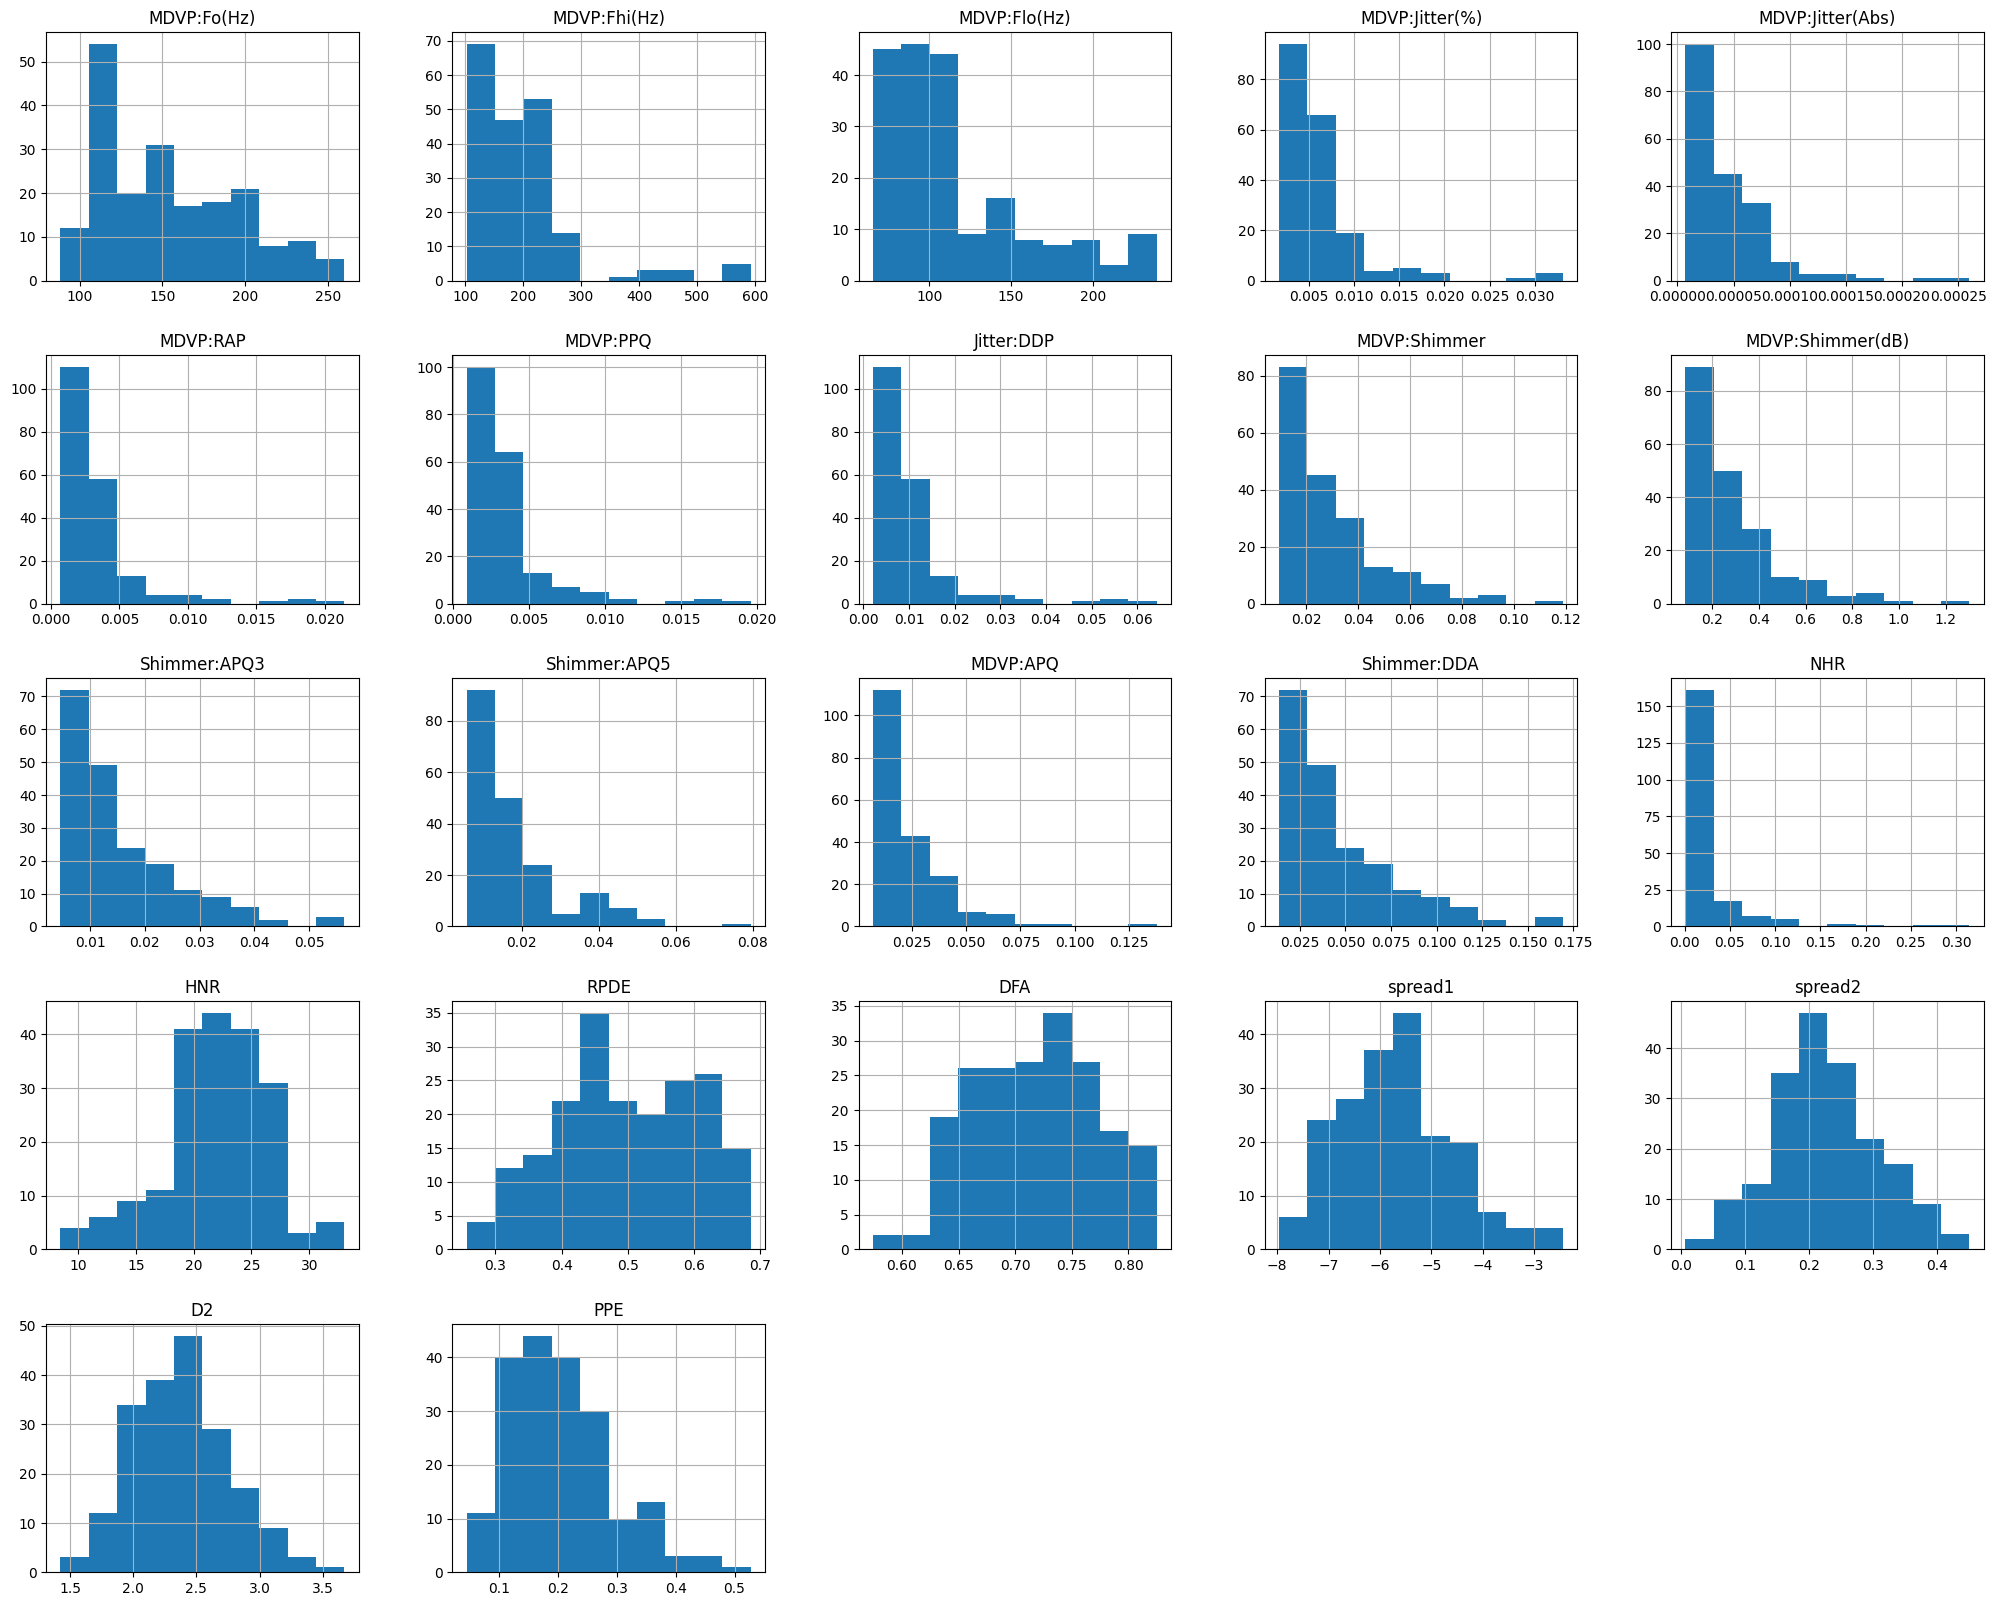

In [ ]:
x1.hist(figsize=(25,20))
plt.show()

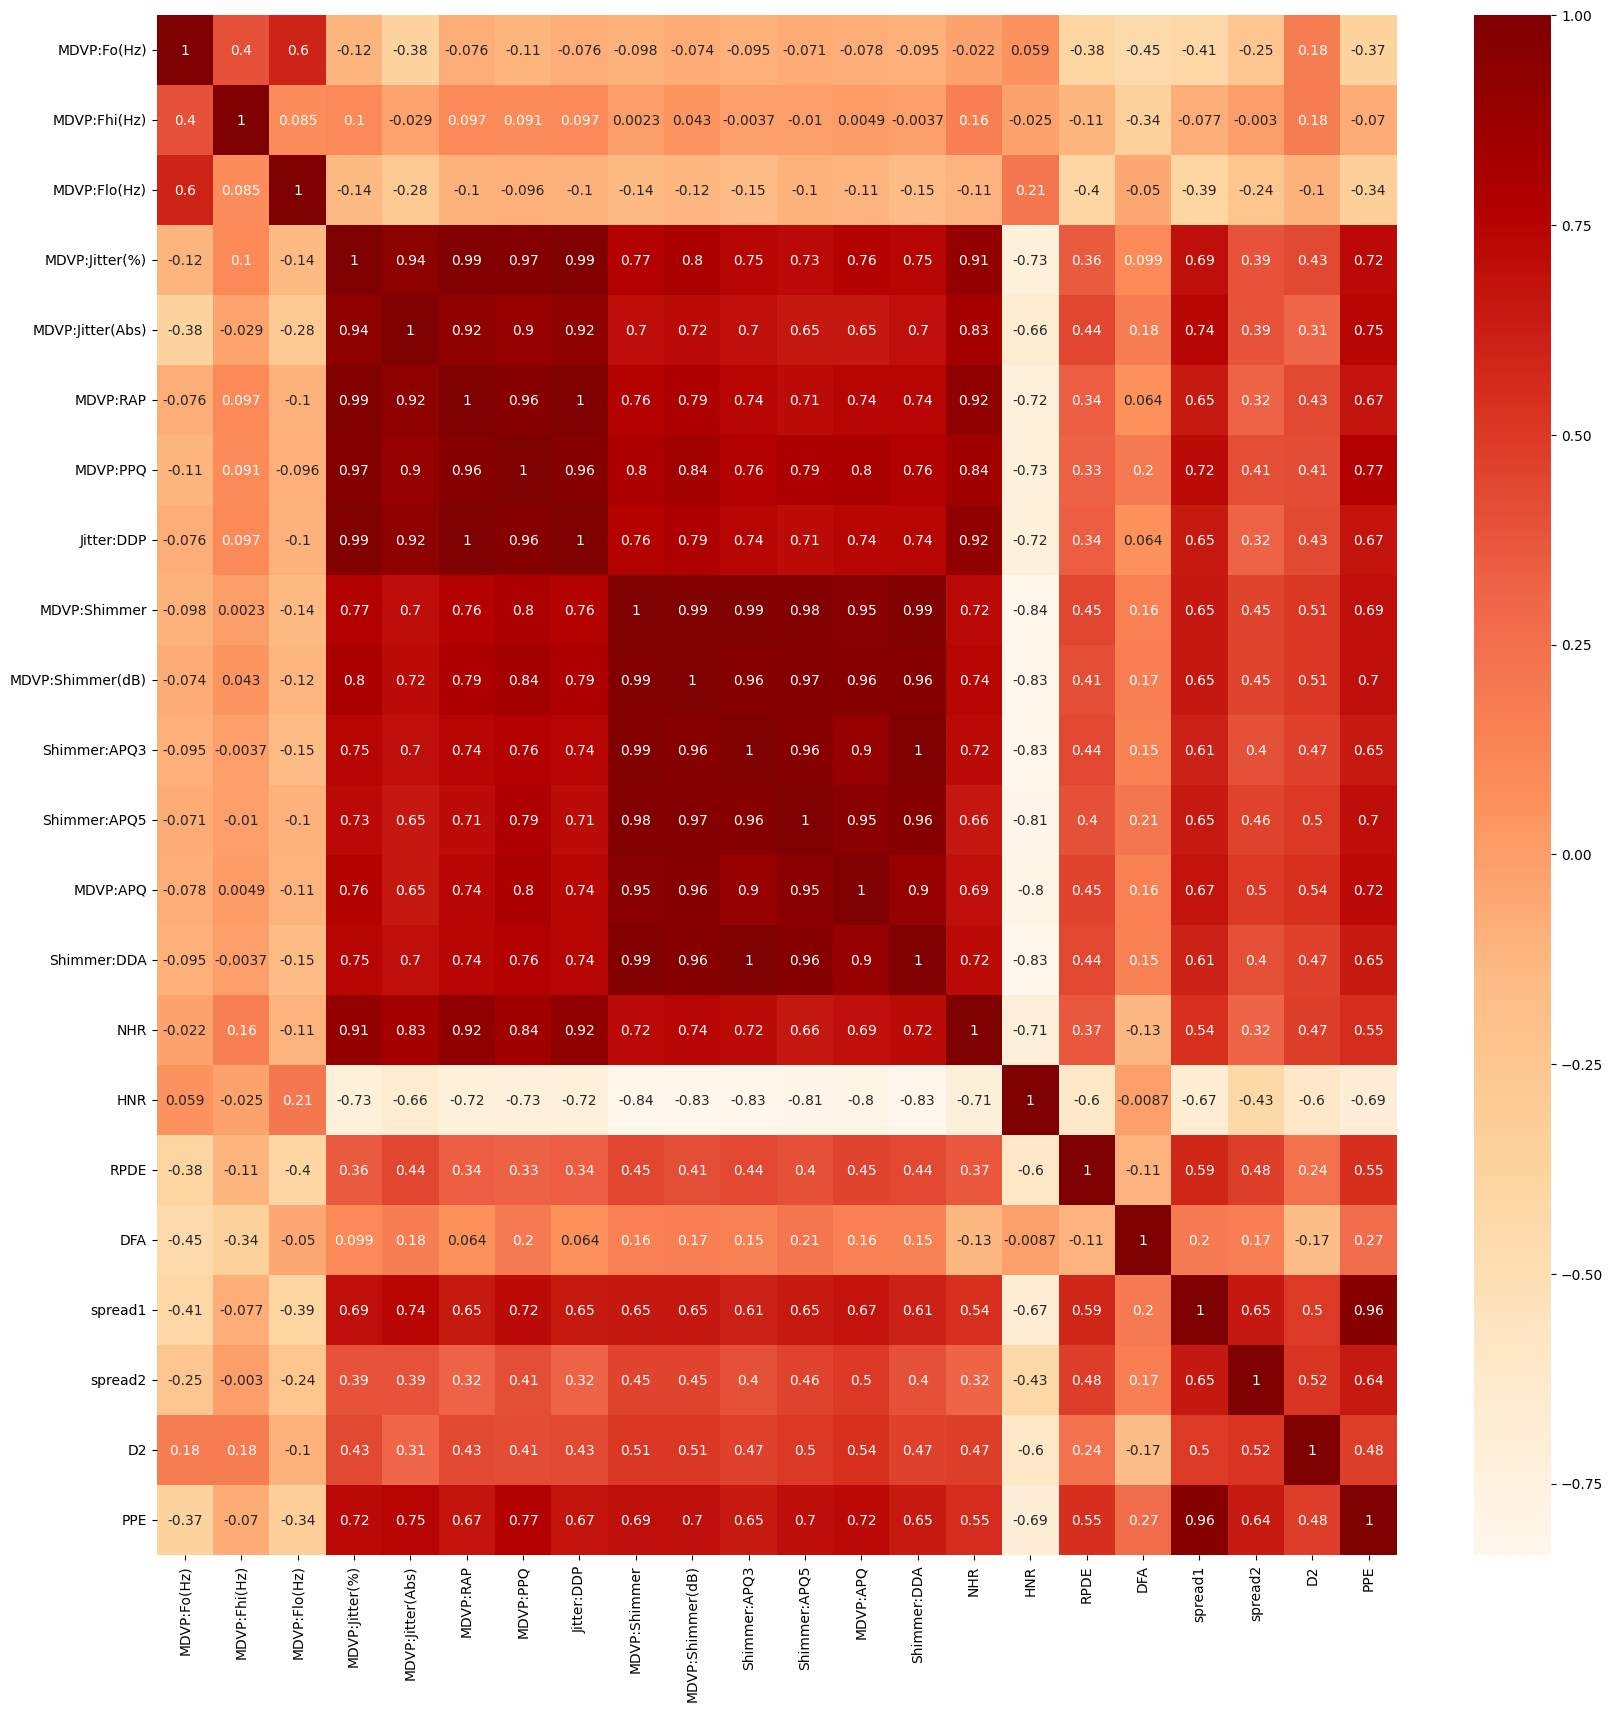

In [ ]:

correl=x1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

# Standardize the data

#Scale the features to between -1 and 1

In [ ]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)

In [ ]:
x

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [ ]:
x.shape

(195, 22)

In [ ]:
y=labels

# Split the dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

# Train the model with XGBoost

In [ ]:
model=XGBClassifier(eval_metric='mlogloss')
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
#perform cross-validation

def crossValidate(model):
    # Using StratifiedKFold to randomly shuffle and divide the data into 10 folds
    strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Specifying the performance metrics we are interested in
    performance_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    # Performing cross-validation using the specified model, data, and evaluation metrics
    cv_results = cross_validate(model, x, y, cv=strat_k_fold, scoring=performance_metrics)

    # Extracting the mean performance scores from the cross-validation results
    result = [round(cv_results[score].mean(), 3) for score in cv_results]

    return result

#Perform cross-validation on the given model and obtain the mean performance scores
result = crossValidate(model)
result[2:]

[0.933, 0.941, 0.973, 0.956, 0.975]

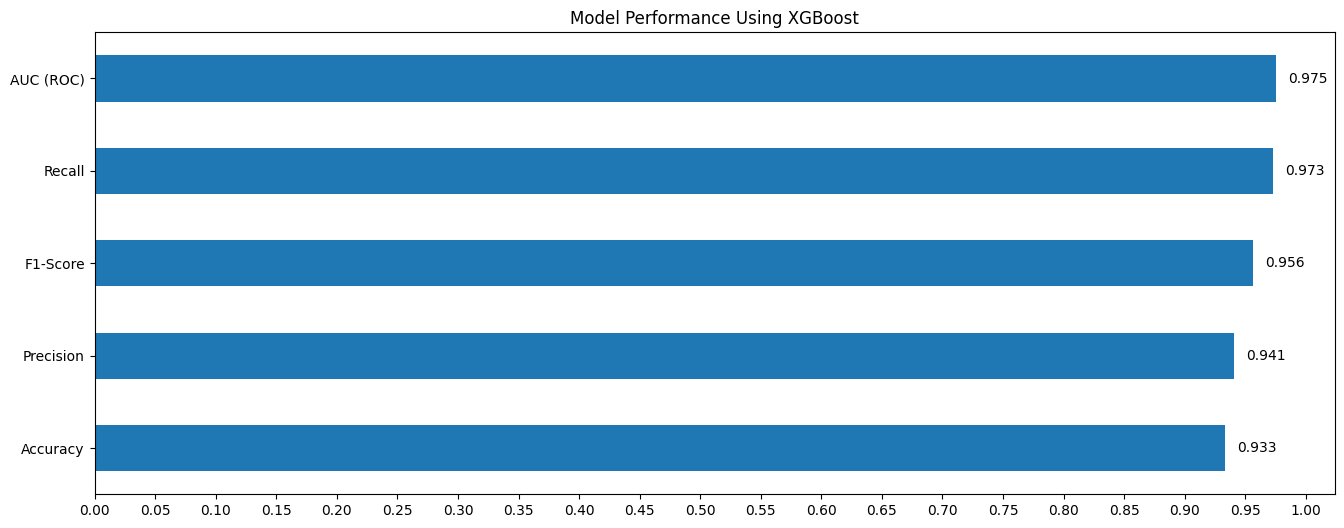

In [ ]:
plt.figure(figsize=(16, 6))

# Create a pandas Series with the performance scores
model_performance = pd.Series(data=result[2:], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC (ROC)'])

# Sort the Series in ascending order
model_performance = model_performance.sort_values()

# Create the horizontal bar plot
ax = model_performance.plot.barh()

# Set the x-axis tick locations
plt.xticks(np.arange(0, 1.05, 0.05))

# Set the title of the plot
plt.title('Model Performance Using XGBoost')
# Add the values on top of each bar
for i, v in enumerate(model_performance):
    ax.text(v + 0.01, i, str(v), color='black', va='center')

# Show the plot
plt.show()

In [ ]:
# Make predictions on the test data
xgb_y_pred=model.predict(x_test)

In [ ]:
# Print the accuracy score for the model
print(accuracy_score(y_test, xgb_y_pred)*100)

94.87179487179486


Text(0.5, 1.0, 'Output Confusion Matrix')

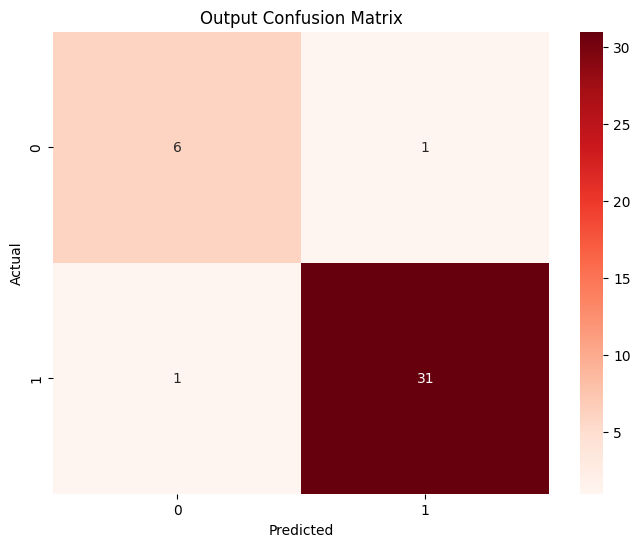

In [ ]:
# Calculate the Confusion Matrix for the model
xgb_cm=confusion_matrix(y_test,xgb_y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(xgb_cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [ ]:
pd.DataFrame(confusion_matrix(y_test, xgb_y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons'])

,Predicted Healthy,Predicted Parkinsons
True Healthy,6,1
True Parkinsons,1,31


ROC AUC score: 0.9129


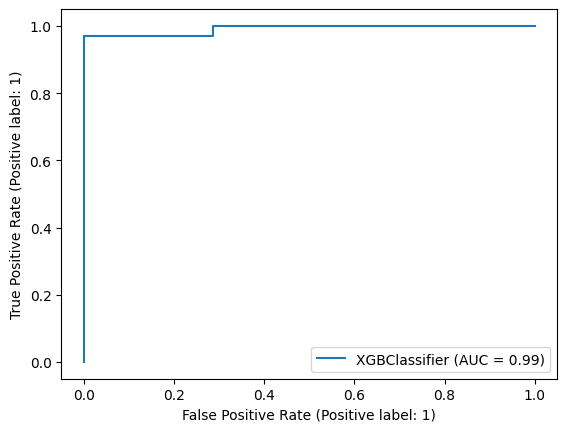

In [ ]:
# Calculate and display ROC AUC score

roc_auc = roc_auc_score(y_test, xgb_y_pred)
print("ROC AUC score: %.4f" % roc_auc)

# Plotting ROC Curve
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [ ]:
# Displaying the classification report

print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
pd.DataFrame({'actual':y_test,'predict':xgb_y_pred})

,actual,predict
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,1,1
9,1,1


#sample test

In [ ]:
#sample data of a patient for test
newinput=[[ 214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.256,0.03078,0.04398,0.0136,0.8167,21.209,0.107,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569]]
# Convert input data to a NumPy array
input_data_array = np.asarray(newinput)

# Reshape the NumPy array to have a single row
input_data_array_reshaped = input_data_array.reshape(1, -1)

# Standardize the data using the scaler
standardized_data = scaler.fit_transform(newinput)

# Predict the label using the model
xgb_output = model.predict(standardized_data)

# Print the prediction result
if xgb_output[0] == 0:
    print("The individual does not have Parkinson's disease")
else:
    print("The individual does have Parkinson's disease")

The individual does not have Parkinson's disease


# Fitting the model in SVM

In [ ]:
classifi1 = SVC()
classifi1.fit(x_train,y_train)

SVC()

#predicting reults

In [ ]:
svm_y_pred = classifi1.predict(x_test)

In [ ]:
print(accuracy_score(y_test, svm_y_pred)*100)

87.17948717948718


Text(0.5, 1.0, 'Output Confusion Matrix')

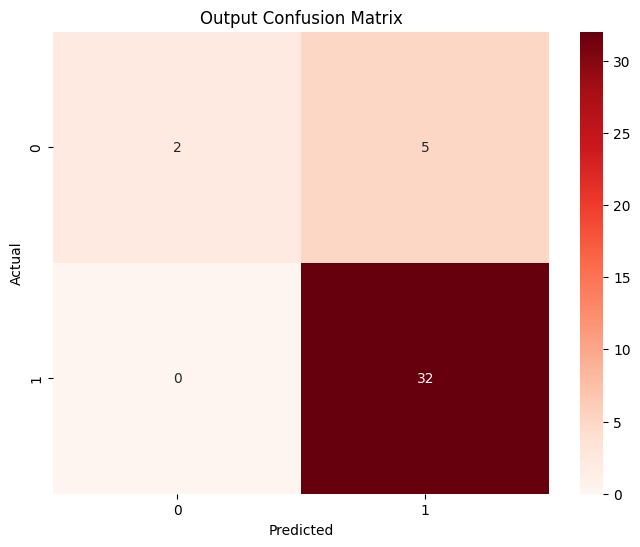

In [ ]:
svm_cm=confusion_matrix(y_test,svm_y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(svm_cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [ ]:
pd.DataFrame(confusion_matrix(y_test, svm_y_pred),
    columns=['Predicted Healthy', 'Predicted Parkinsons'],
    index=['True Healthy', 'True Parkinsons'])

,Predicted Healthy,Predicted Parkinsons
True Healthy,2,5
True Parkinsons,0,32


In [ ]:
# Predict the label using the model
svm_output = classifi1.predict(standardized_data)

# Print the prediction result
if svm_output[0] == 0:
    print("The individual does not have Parkinson's disease")
else:
    print("The individual does have Parkinson's disease")

The individual does have Parkinson's disease


# Fitting the Model in Knn

In [ ]:
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

variance = pca.explained_variance_ratio_

In [ ]:
classifi2 = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')
classifi2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn_y_pred = classifi2.predict(x_test)

In [ ]:
accuracy_score(y_test,knn_y_pred)

0.8974358974358975

Text(0.5, 1.0, 'Output Confusion Matrix')

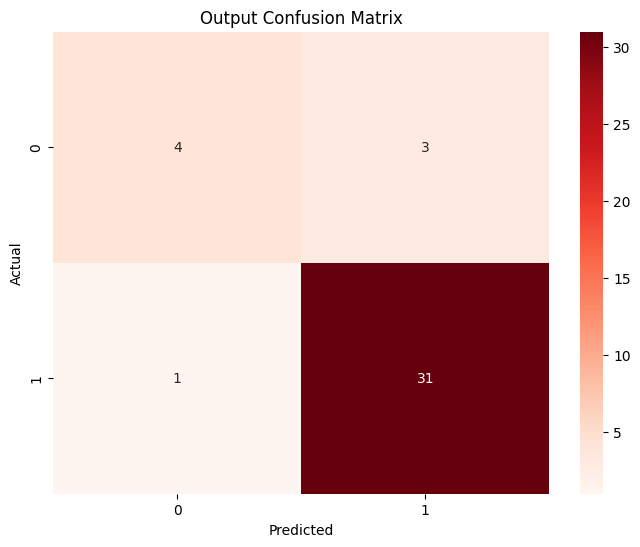

In [ ]:
knn_cm=confusion_matrix(y_test,knn_y_pred)
plt.figure(figsize=(8,6))
fg=sns.heatmap(knn_cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [ ]:
pd.DataFrame(confusion_matrix(y_test, knn_y_pred),

    columns=['Predicted Healthy', 'Predicted Parkinsons'],

    index=['True Healthy', 'True Parkinsons'])

,Predicted Healthy,Predicted Parkinsons
True Healthy,4,3
True Parkinsons,1,31
